<a href="https://colab.research.google.com/github/jmollan/PUCP/blob/main/Python2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import seaborn as sns
from datetime import datetime as dt
from IPython.display import display
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_excel ("BASE DATA THE COCA COLA COMPANY.xlsx")


In [ ]:
print(df.head(20))


     Año  MES        PRODUCTO PRESENTACIÓN  PAIS     ZONA  PRECIO  \
0   2017    1       COCA COLA   2.5 LITROS  PERU  ORIENTE     9.2   
1   2017    1       COCA COLA  MEDIO LITRO  PERU    NORTE     2.9   
2   2017    1           FANTA  MEDIO LITRO  PERU  ORIENTE     2.0   
3   2017    1       COCA COLA  MEDIO LITRO  PERU     LIMA     2.9   
4   2017    1           FANTA     2 LITROS  PERU  ORIENTE     5.4   
5   2017    1           FANTA     2 LITROS  PERU     LIMA     5.4   
6   2017    1      FANTA ZERO  MEDIO LITRO  PERU   CENTRO     2.5   
7   2017    1      FANTA ZERO     2 LITROS  PERU     LIMA     6.0   
8   2017    1      FANTA ZERO     2 LITROS  PERU  ORIENTE     6.0   
9   2017    1  INCA KOLA ZERO  MEDIO LITRO  PERU   CENTRO     3.0   
10  2017    1  INCA KOLA ZERO   2.5 LITROS  PERU    NORTE     9.2   
11  2017    1  INCA KOLA ZERO  MEDIO LITRO  PERU  ORIENTE     3.0   
12  2017    1  COCA COLA ZERO   2.5 LITROS  PERU   CENTRO     9.2   
13  2017    1  COCA COLA ZERO   2.

In [ ]:
SALIDAXZONA = df.groupby('ZONA')['VENTAS'].sum()

In [ ]:
import pandas as pd

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Pivotar el DataFrame para tener ZONAs como columnas y PRODUCTOs
tabla_pivotada = df.pivot_table(index='PRODUCTO', columns='ZONA', values='VENTAS', aggfunc='sum')

# Convertir las ventas y redondear a dos decimales
tabla_pivotada_millones = (tabla_pivotada / 1e6).round(2)

# Agregar una columna "Venta Total" que sume las ventas totales por fila (producto)
tabla_pivotada_millones['Venta Total'] = tabla_pivotada_millones.sum(axis=1)

tabla_pivotada_millones


ZONA,CENTRO,LIMA,NORTE,ORIENTE,SUR,Venta Total
PRODUCTO,,,,,,
COCA COLA,12.45,8.95,8.37,11.47,10.23,51.47
COCA COLA ZERO,5.44,5.53,4.71,6.90,7.19,29.77
FANTA,3.25,2.92,2.37,2.99,2.63,14.16
FANTA ZERO,3.23,4.07,3.37,3.47,4.60,18.74
INCA KOLA,4.10,6.26,5.24,4.99,5.89,26.48
INCA KOLA ZERO,56.15,59.74,48.20,66.68,61.14,291.91
SPRITE,1.98,1.34,1.09,1.20,1.51,7.12
SPRITE ZERO,40.65,29.20,60.18,63.48,41.85,235.36


<Axes: xlabel='ZONA'>

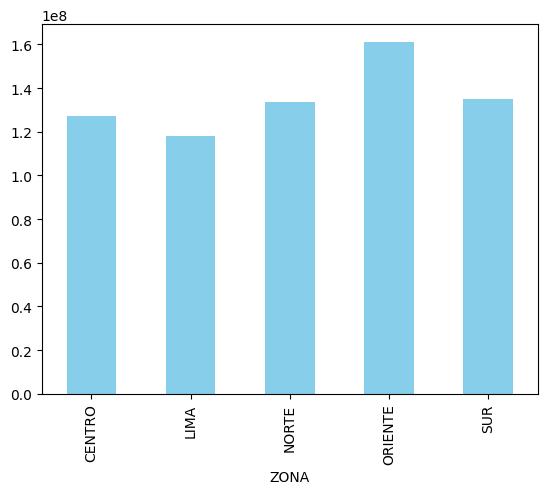

In [ ]:
SALIDAXZONA.plot(kind='bar',color='skyblue')


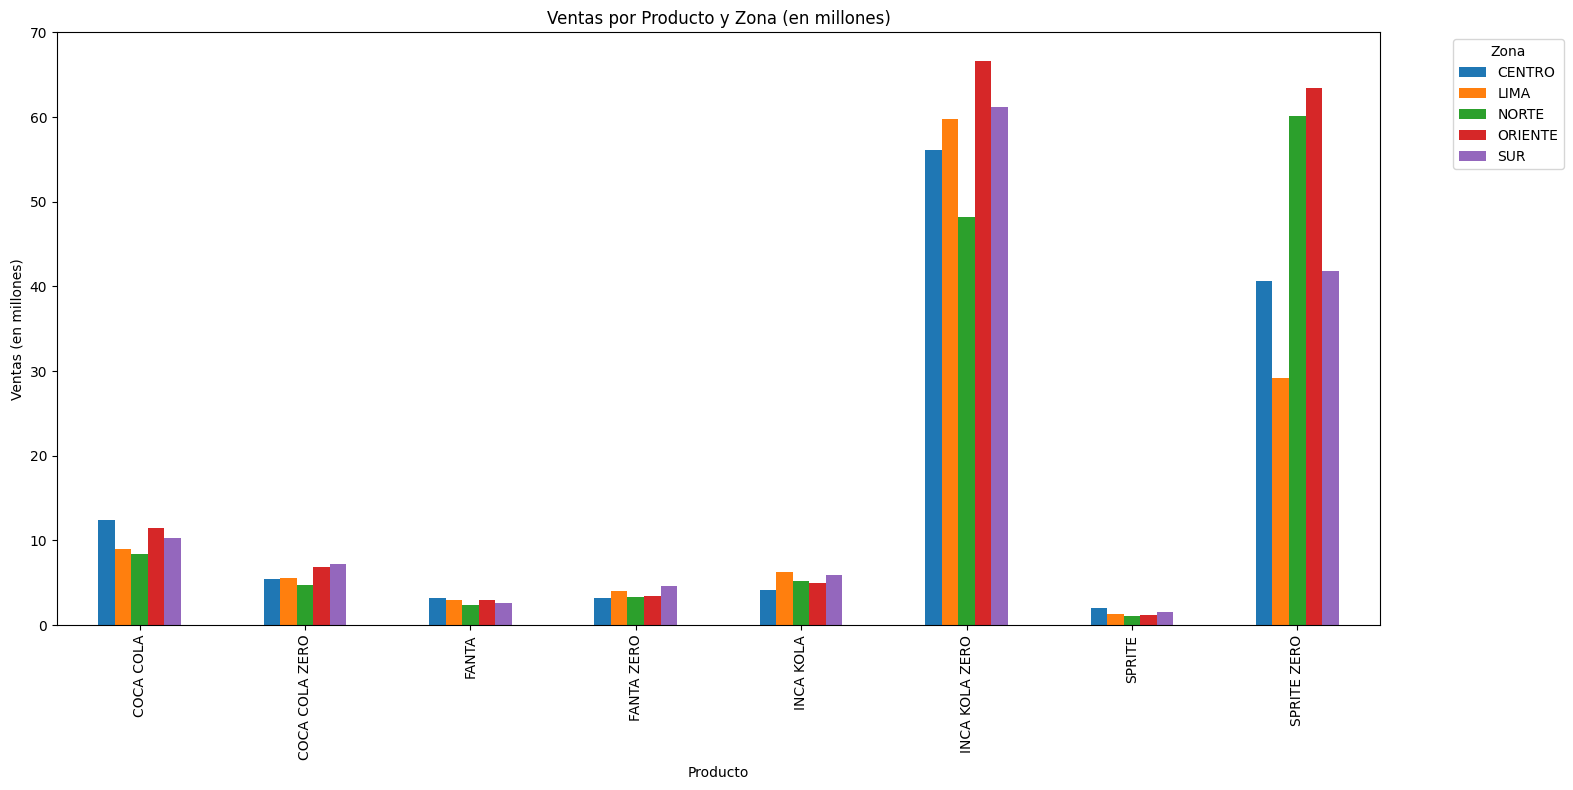

In [ ]:


# Cargar el archivo Excel en un DataFrame
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Pivotar el DataFrame para tener ZONAs como columnas y PRODUCTOs
tabla_pivotada = df.pivot_table(index='PRODUCTO', columns='ZONA', values='VENTAS', aggfunc='sum')

# Convertir las ventas y redondear a dos decimales
tabla_pivotada_millones = (tabla_pivotada / 1e6).round(2)

# Agregar una columna "Venta Total" que sume las ventas totales por fila (producto)
#tabla_pivotada_millones['Venta Total'] = tabla_pivotada_millones.sum(axis=1)

# Crear el gráfico de columnas
tabla_pivotada_millones.plot(kind='bar', figsize=(14, 8))

# Añadir título y etiquetas a los ejes
plt.title('Ventas por Producto y Zona (en millones)')
plt.xlabel('Producto')
plt.ylabel('Ventas (en millones)')
plt.tight_layout()

# Mostrar el gráfico con la leyenda fuera del área del gráfico
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


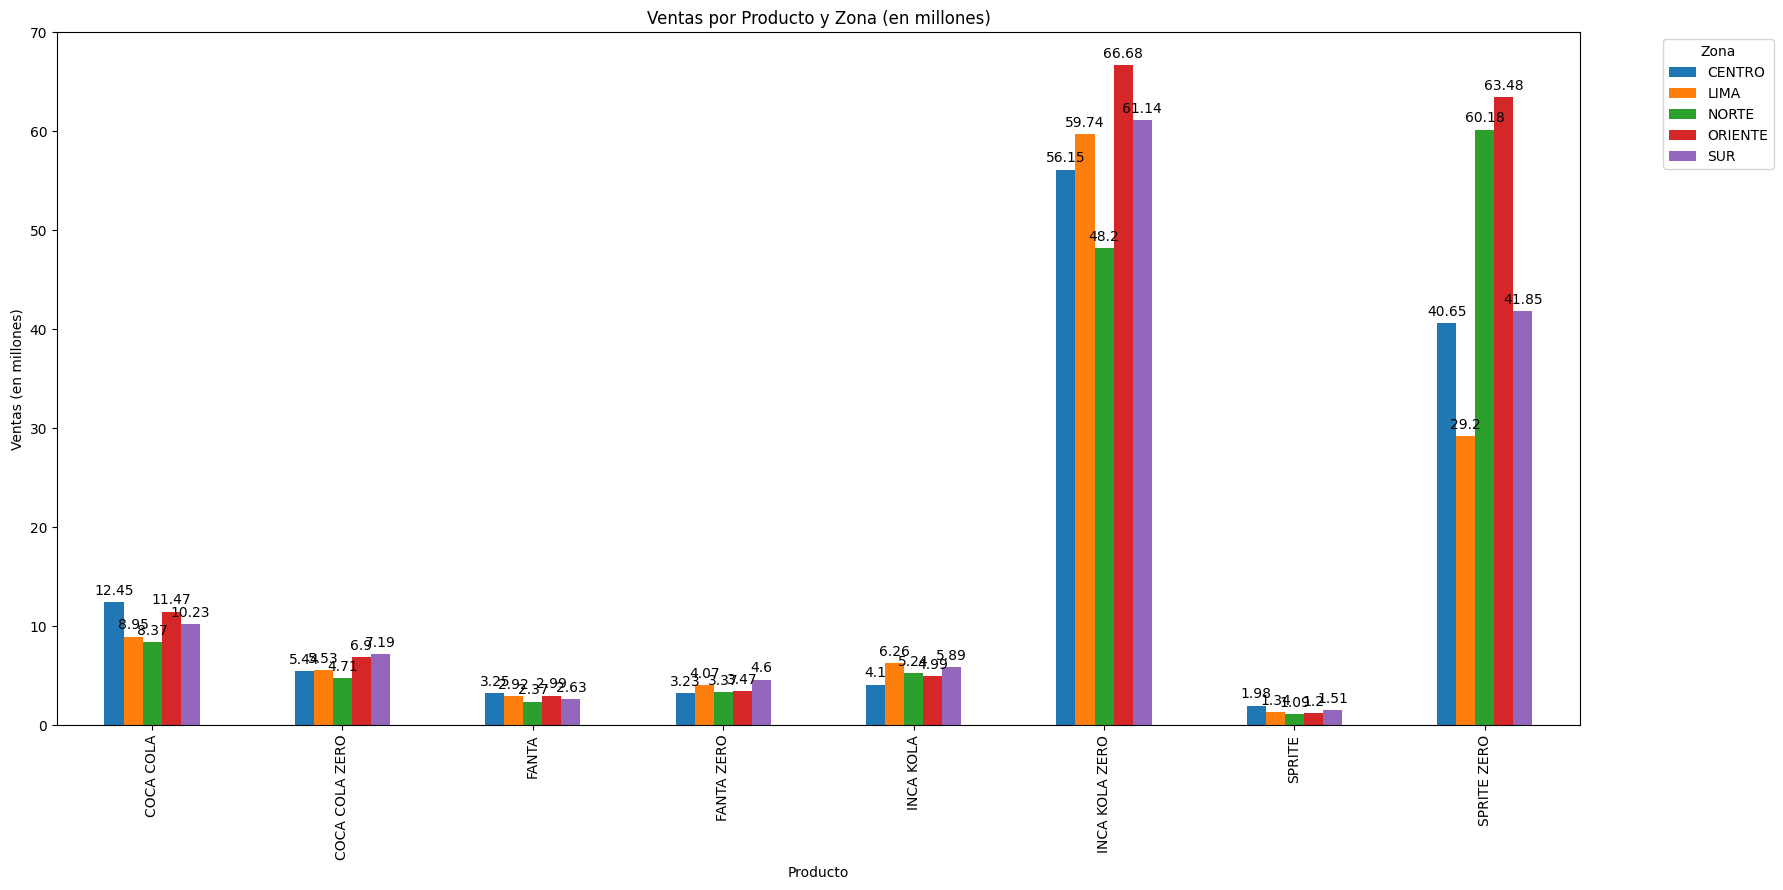

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Pivotar el DataFrame para tener ZONAs como columnas y PRODUCTOs
tabla_pivotada = df.pivot_table(index='PRODUCTO', columns='ZONA', values='VENTAS', aggfunc='sum')

# Convertir las ventas y redondear a dos decimales
tabla_pivotada_millones = (tabla_pivotada / 1e6).round(2)

# Agregar una columna "Venta Total" que sume las ventas totales por fila (producto)
#tabla_pivotada_millones['Venta Total'] = tabla_pivotada_millones.sum(axis=1)

# Crear el gráfico de columnas
ax = tabla_pivotada_millones.plot(kind='bar', figsize=(16, 9))

# Añadir título y etiquetas a los ejes
plt.title('Ventas por Producto y Zona (en millones)')
plt.xlabel('Producto')
plt.ylabel('Ventas (en millones)')
plt.tight_layout()

# Agregar etiquetas a cada columna
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Mostrar el gráfico con la leyenda fuera del área del gráfico
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats

# Cargar los datos desde el archivo Excel
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Cálculo del Error Estándar para la columna VENTAS
ventas = df['VENTAS']
n = len(ventas)
media_ventas = ventas.mean()
std_ventas = ventas.std()
se_ventas = std_ventas / (n**0.5)

# Cálculo del Intervalo de Confianza del 95% para la columna VENTAS
z_value = stats.norm.ppf(0.975)  # Valor Z para un nivel de confianza del 95%
margen_error = z_value * se_ventas
ic_inferior = media_ventas - margen_error
ic_superior = media_ventas + margen_error

print(f"Error Estándar: {se_ventas:.2f}")
print(f"Intervalo de Confianza del 95%: ({ic_inferior:.2f}, {ic_superior:.2f})")


Error Estándar: 16205.67
Intervalo de Confianza del 95%: (245442.70, 308967.74)


In [ ]:
VENTAS_PRODUCTO = df.groupby('PRODUCTO')['VENTAS'].sum()
VENTAS_PRODUCTO_ZONA = df.groupby(['ZONA','PRODUCTO'])['VENTAS'].sum()

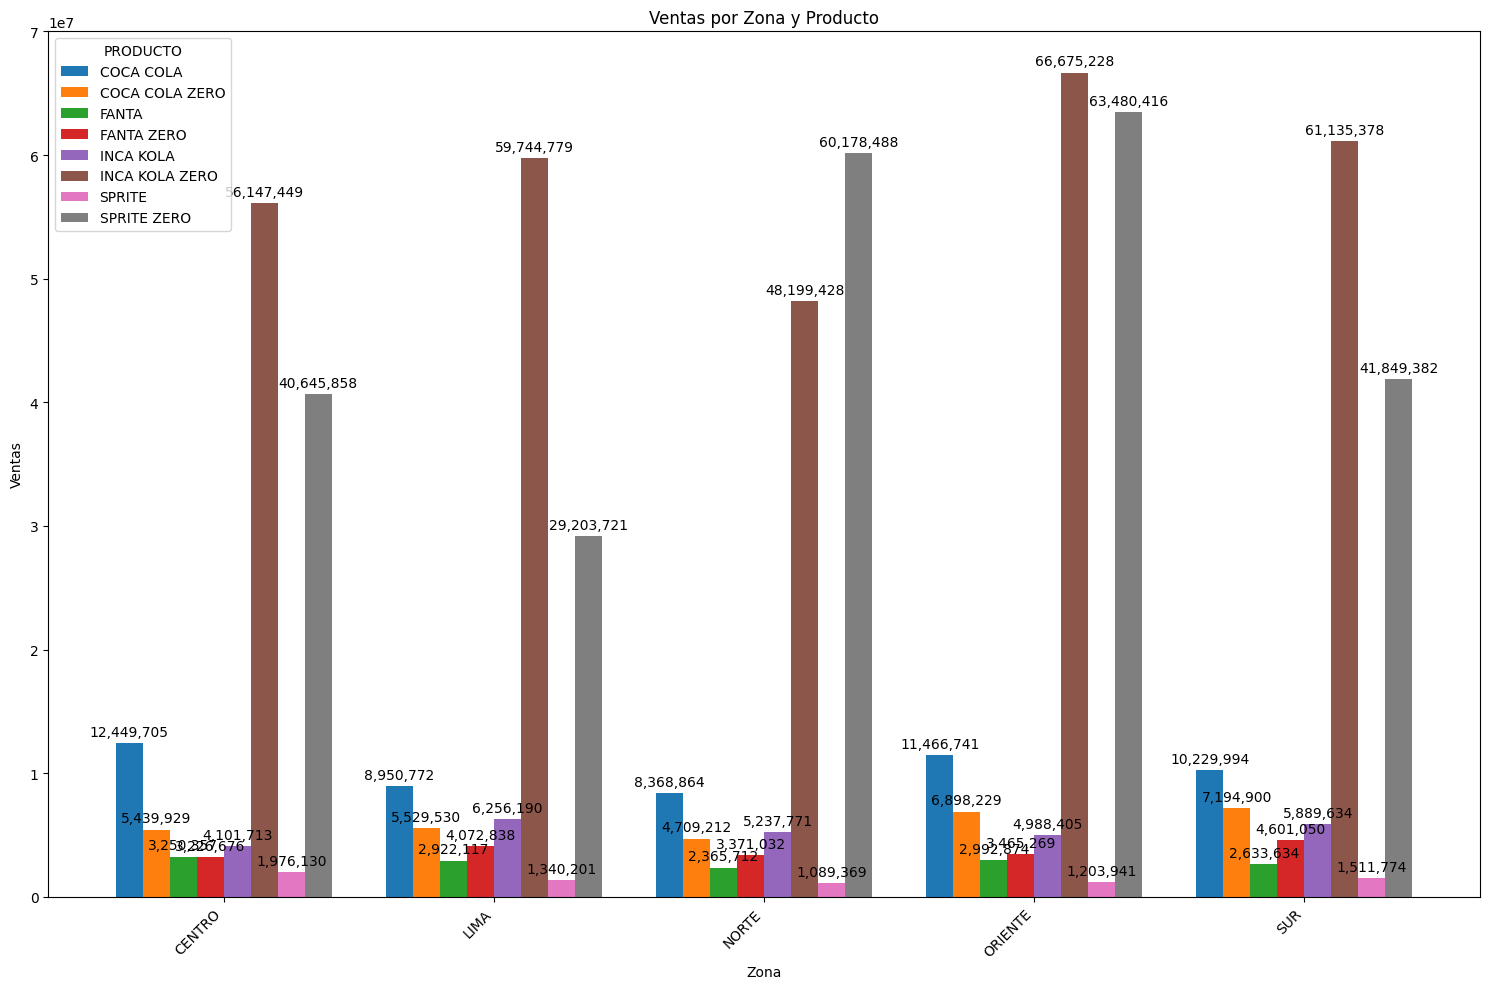

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leemos la base de datos original
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización

# Agregar etiquetas a cada barra con formato de separador de miles
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height):,}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()




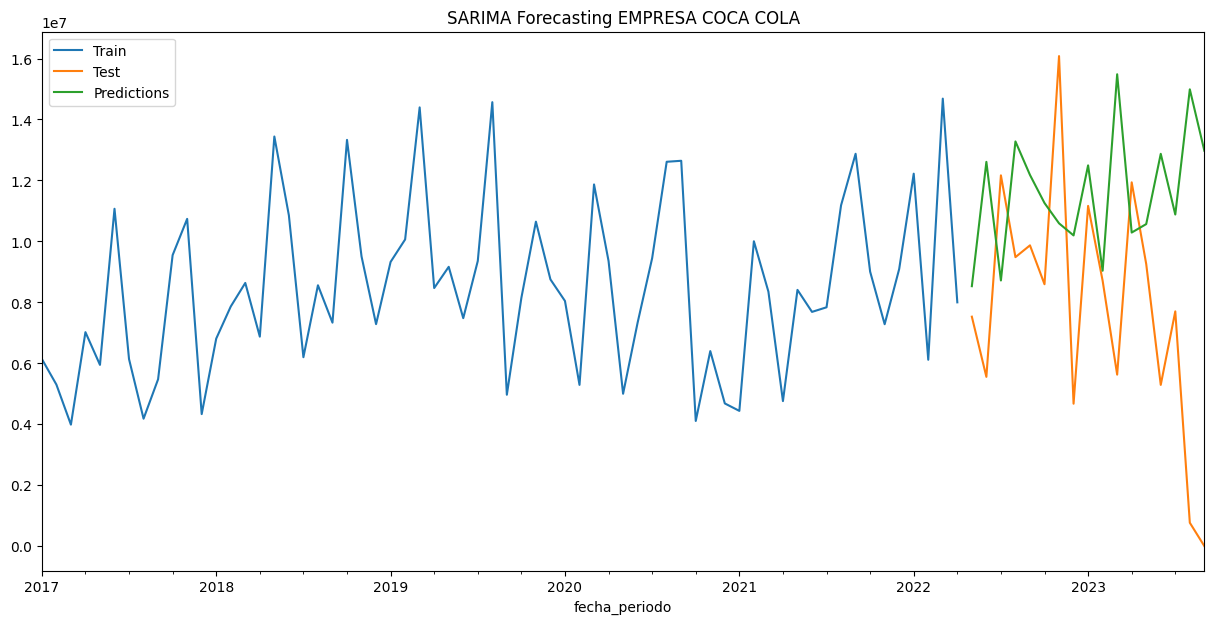

In [ ]:
# SARIMA FORECASTING / EMPRESA COCA COLA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer el archivo Excel / CORREGIDO
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Dividir datos en entrenamiento y prueba
train_size = int(0.8 * len(df_aggregated))
train, test = df_aggregated[:train_size], df_aggregated[train_size:]

# Ajustar el modelo SARIMA con los mejores parámetros encontrados
best_order = (2, 1, 2)
best_seasonal_order = (2, 1, 2, 12)
sarima_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# #### Realizar predicciones cargando el resultado del codigo anterior
predictions = sarima_result.predict(start=test.index[0], end=test.index[-1], dynamic=True)

# Graficar resultados
plt.figure(figsize=(15, 7))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
predictions.plot(label='Predictions', legend=True)
plt.title('SARIMA Forecasting EMPRESA COCA COLA')
plt.show()


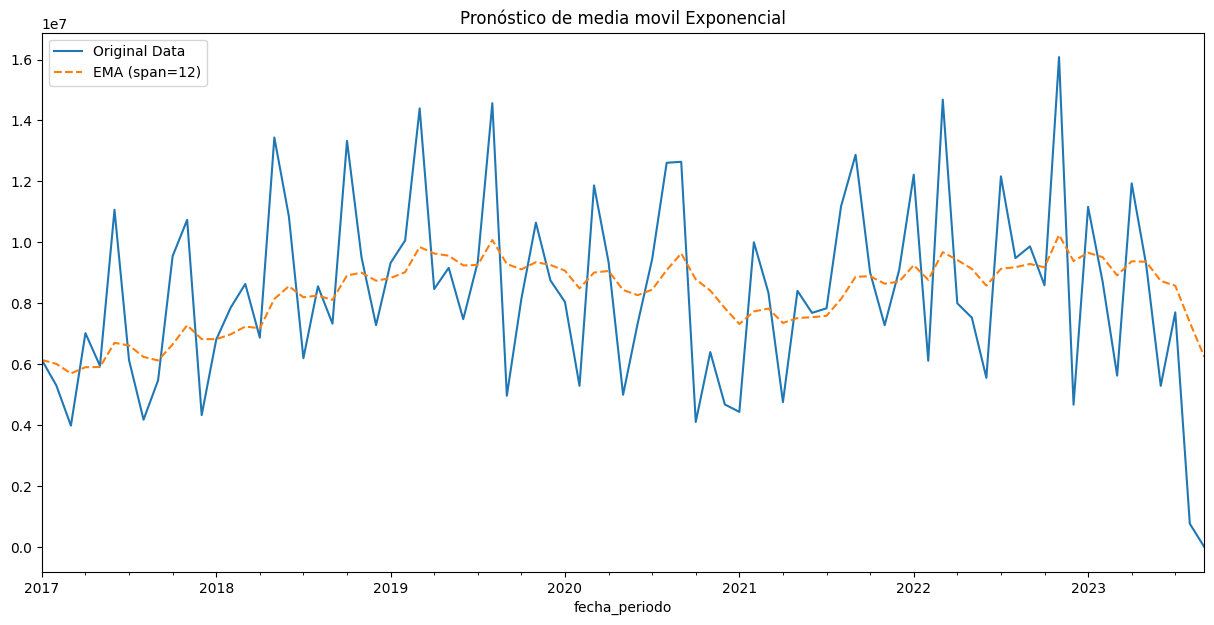

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Leer el archivo Excel
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Calcular la Media Móvil Exponencial
span = 12  # Ajuste de 12 meses para una EMA de un año para datos mensuales)
ema = df_aggregated.ewm(span=span, adjust=False).mean()

# Graficar resultados
plt.figure(figsize=(15, 7))
df_aggregated.plot(label='Original Data', legend=True)
ema.plot(label=f'EMA (span={span})', legend=True, linestyle='--')
plt.title('Pronóstico de media movil Exponencial')
plt.show()


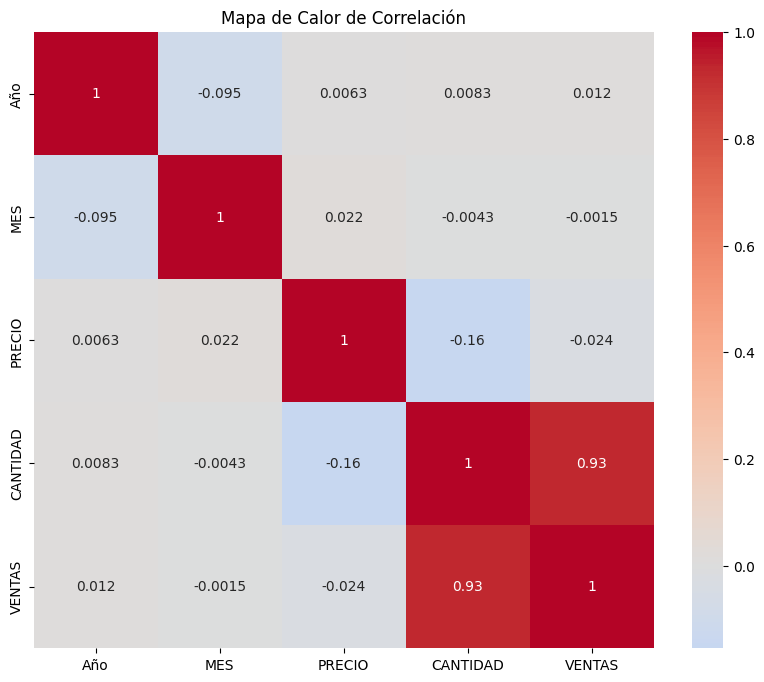

In [ ]:


# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación')
plt.show()


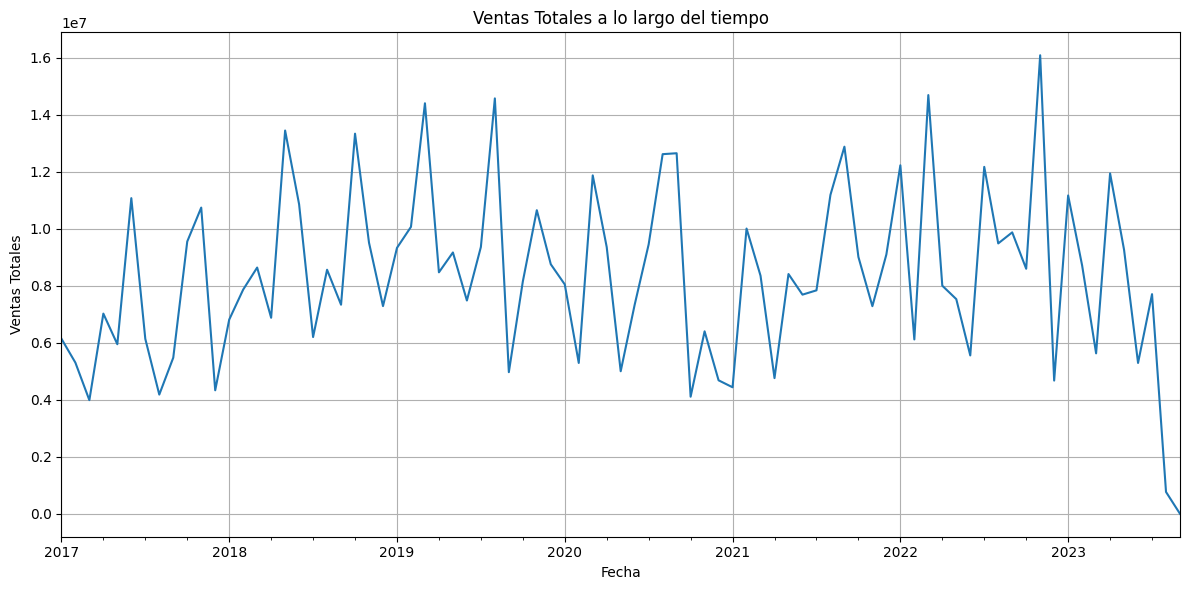

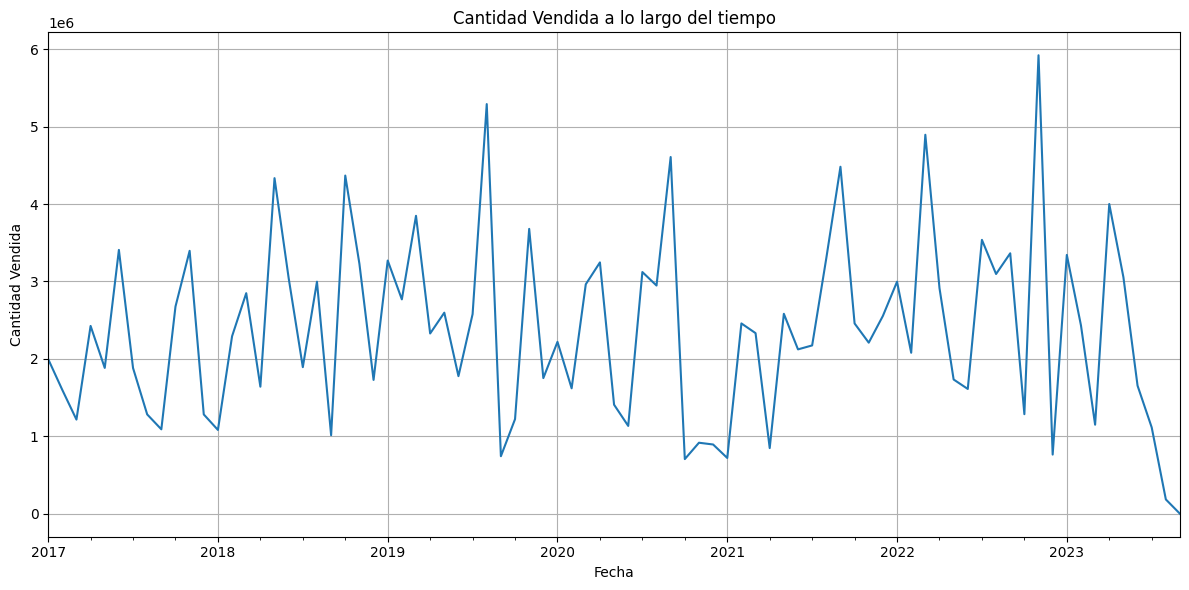

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Gráfico de líneas para las Ventas Totales a lo largo del tiempo
sales_time_series = df['VENTAS'].resample('M').sum()
plt.figure(figsize=(12, 6))
sales_time_series.plot()
plt.title('Ventas Totales a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de líneas para la Cantidad Vendida a lo largo del tiempo
quantity_time_series = df['CANTIDAD'].resample('M').sum()
plt.figure(figsize=(12, 6))
quantity_time_series.plot()
plt.title('Cantidad Vendida a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()


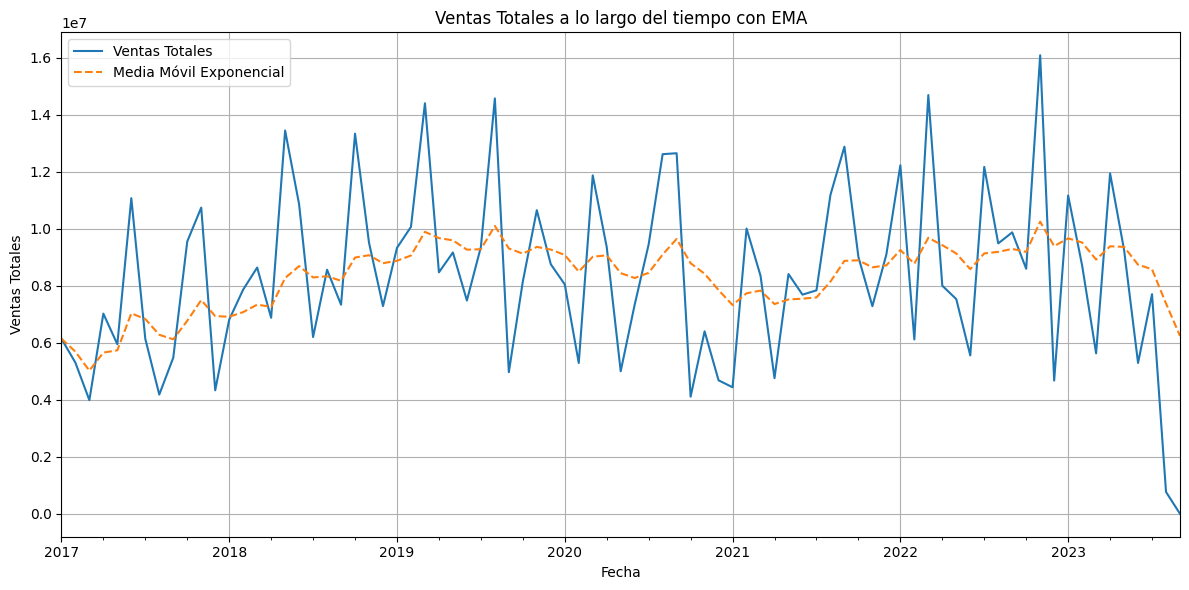

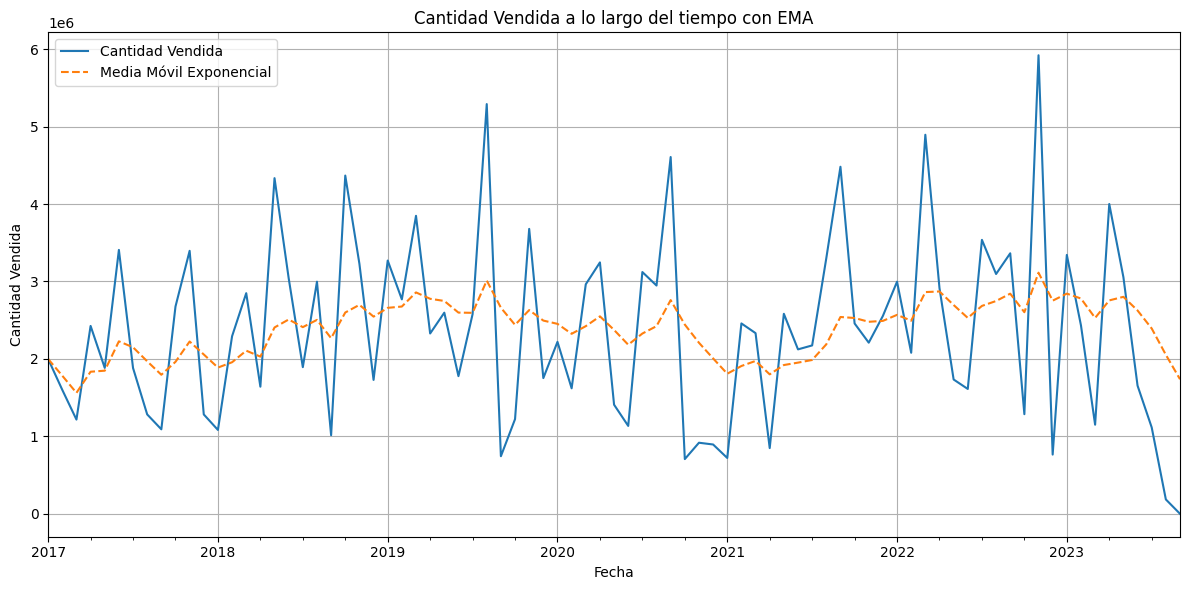

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Gráfico de líneas para las Ventas Totales a lo largo del tiempo
sales_time_series = df['VENTAS'].resample('M').sum()
sales_ema = sales_time_series.ewm(span=12).mean()  # EMA con una ventana de 12 meses

plt.figure(figsize=(12, 6))
sales_time_series.plot(label='Ventas Totales')
sales_ema.plot(label='Media Móvil Exponencial', linestyle='--')
plt.title('Ventas Totales a lo largo del tiempo con EMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de líneas para la Cantidad Vendida a lo largo del tiempo

quantity_time_series = df['CANTIDAD'].resample('M').sum()
quantity_ema = quantity_time_series.ewm(span=12).mean()  # EMA con un rango de 12 meses

plt.figure(figsize=(12, 6))
quantity_time_series.plot(label='Cantidad Vendida')
quantity_ema.plot(label='Media Móvil Exponencial', linestyle='--')
plt.title('Cantidad Vendida a lo largo del tiempo con EMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


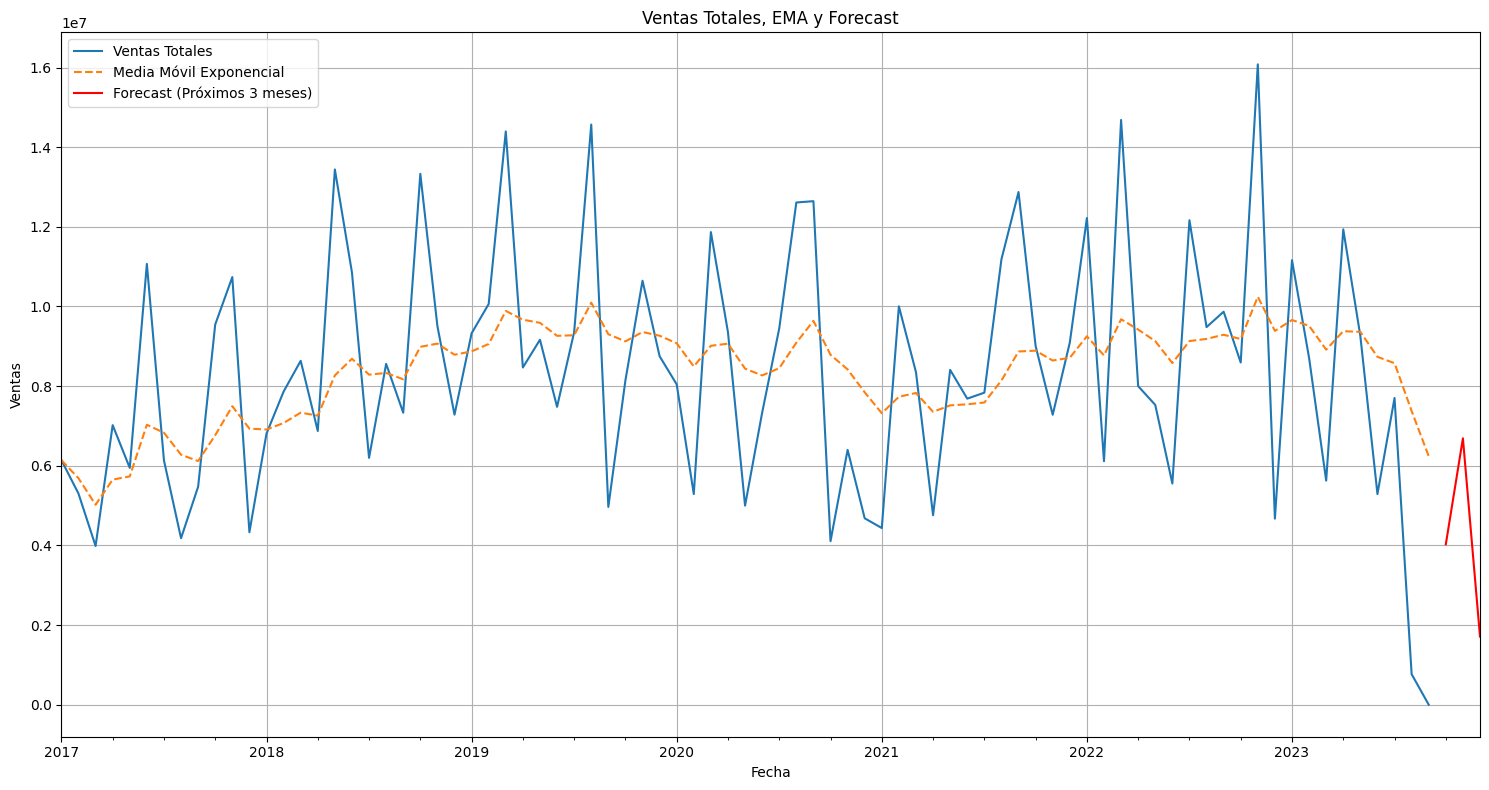

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Agregar las ventas para obtener una serie temporal
time_series = df['VENTAS'].resample('M').sum()

# Definir parámetros para el modelo SARIMA (estos parámetros pueden requerir otro ajuste)
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# Ajustar el modelo SARIMA
sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones para los próximos 3 meses
forecast = sarima_result.get_forecast(steps=3).predicted_mean

# Calcular la EMA para 12 meses
sales_ema = time_series.ewm(span=12).mean()

# Gráfico de ventas, EMA y predicciones
plt.figure(figsize=(15, 8))
time_series.plot(label='Ventas Totales', legend=True)
sales_ema.plot(label='Media Móvil Exponencial', linestyle='--', legend=True)
forecast.plot(label='Forecast (Próximos 3 meses)', color='red', legend=True)

plt.title('Ventas Totales, EMA y Forecast')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()
